In [1]:
## ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from qulacs import QuantumState
from qulacs.state import inner_product
from qulacs import QuantumCircuit
from qulacs.gate import to_matrix_gate
from qulacs import QuantumState
from qulacs.gate import Identity, X,Y,Z #パウリ演算子
from qulacs.gate import H
from qulacs.gate import RX,RY,RZ #パウリ演算子についての回転演算

## 理想的な回路作成


In [2]:
# 係数の絶対値の分布をプロットする関数
def show_distribution(state, nqubits):
    plt.bar([i for i in range(pow(2, nqubits))], abs(state.get_vector()))

### 動作の確認
5量子ビットのアルゴリズムを実装し、動作を確認する。

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
adf:(1+0j)
初期：[0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j]


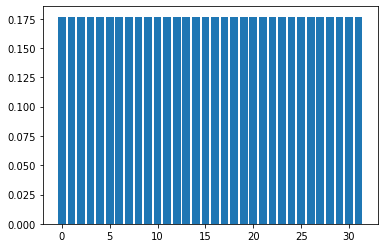

In [3]:
nqubits = 5
state = QuantumState(nqubits)
state.set_zero_state()
print(state.get_vector())
print(f'adf:{state.get_vector()[0]}')
# state.set_random_state()
# print(state.get_vector())

def make_Hadamard(nqubits):
    Hadamard = QuantumCircuit(nqubits)
    for i in range(nqubits):
        Hadamard.add_gate(H(i))
    return  Hadamard

Hadamard = make_Hadamard(nqubits)
Hadamard.update_quantum_state(state)

show_distribution(state, nqubits)
print(f'初期：{state.get_vector()}')



In [4]:
# オラクルU_wの作成
def make_U_w(nqubits):
    U_w = QuantumCircuit(nqubits)
    CnZ = to_matrix_gate(Z(nqubits-1))
    # i-th qubitが全て1の場合だけゲートを作用
    for i in range(nqubits-1):
        control_index = i
        control_with_value = 1
        CnZ.add_control_qubit(control_index, control_with_value)
    U_w.add_gate(CnZ)
    return U_w

In [5]:
# 反転U_sを作る
def make_U_s(nqubits):
    U_s = QuantumCircuit(nqubits)
    for i in range(nqubits):
        U_s.add_gate(H(i))

    ## 2|0><0| - I の実装
    U_s.add_gate(to_matrix_gate(RZ(nqubits-1, 2*np.pi))) ## まず、位相(-1)を全ての状態に付与する。ゲート行列はarrary([[-1,0],[0,-1]])
    U_s.add_gate( X(nqubits-1) )
    ## 全てのi-th qubitが0の場合だけZゲートを作用させる
    CnZ = to_matrix_gate(Z(nqubits-1))
    for i in range(nqubits-1):
        control_index = i
        control_with_value = 0
        CnZ.add_control_qubit(control_index, control_with_value)
    U_s.add_gate( CnZ )
    U_s.add_gate( X(nqubits-1) )

    for i in range(nqubits):
        U_s.add_gate(H(i))

    return U_s

In [6]:
hoge = state.copy()
U_w = make_U_w(nqubits)
U_w.update_quantum_state(hoge)
print(hoge.get_vector())

[ 0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j -0.1767767+0.j]


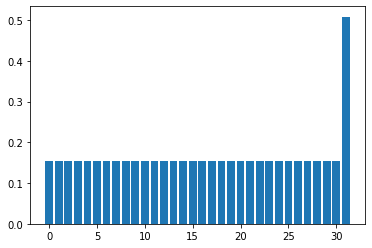

In [7]:
# 初期状態の準備
state = QuantumState(nqubits)
state.set_zero_state()
Hadamard.update_quantum_state(state)

# U_s, U_wを作用
U_s = make_U_s(nqubits)
U_w.update_quantum_state(state)
U_s.update_quantum_state(state)
show_distribution(state, nqubits)

In [8]:
nqubits = 5

# グローバーのアルゴリズム
def grover(nqubits, operate_time):
    state = QuantumState(nqubits)
    state.set_zero_state()

    # 内積を評価するために 解状態 |1...1> を作っておく
    target_state = QuantumState(nqubits)
    target_state.set_computational_basis(2 ** nqubits - 1) # 2**n_qubits-1 は 2進数で 1...1

    # グローバーのアルゴリズムの実行
    Hadamard = make_Hadamard(nqubits)
    U_w = make_U_w(nqubits)
    U_s = make_U_s(nqubits)

    result = []

    state = QuantumState(nqubits)
    state.set_zero_state()
    Hadamard.update_quantum_state(state)
    for k in range(operate_time):
        U_w.update_quantum_state(state)
        U_s.update_quantum_state(state)
        # show_distribution(state, nqubits)
        fuga = np.linalg.norm(inner_product(state, target_state))
        result.append(fuga)
        print(fuga)


    max_k = np.argmax(result)
    print(f'maximal probability {result[max_k]:5e} is obtained at k = {max_k + 1}')

    # plt.plot(np.arange(1, 30+1), result, "o-")
    plt.plot(result, "o-")

0.5082329989778305
0.7761601777867947
0.9470673343724091
0.9995910741614723
0.9271659296803515
0.738845043989187
0.4581685277993745
0.1202209456346408
0.23275425473442243
0.5566351732616823
maximal probability 9.995911e-01 is obtained at k = 4


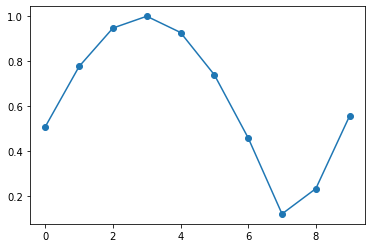

In [9]:
grover(5, 10)

## ランダムな初期状態の作成
次に、ランダムな初期状態を作成する。

In [10]:
from qulacs import DensityMatrix

# nqubits = 5
# state = QuantumState(nqubits)
# state
# mat = state.get_vector()
# hoge, fuga = np.split(mat, [int(mat.size * 0.7)])

# print(f'hogeL:{hoge}, fuga:{fuga}')

# hogeとfugaをQuantumStateに戻す

# ノイズを作用させる
# 配列を合わせて、シャッフルする
# QuantumStateの形に戻す
# →複素数からQuantumStateに戻すには、量子ビット数が必要

In [11]:
# 量子状態と複素数の積を利用して計算

nqubits = 5
p = 0.5
state1 = QuantumState(nqubits)
state2 = QuantumState(nqubits)
state1.set_zero_state()
state2.set_zero_state()
# psi_0, psi_Haar = state
psi_0 = state1
psi_Haar = state2

Hadamard = make_Hadamard(nqubits)
Hadamard.update_quantum_state(psi_0)

psi_Haar.set_Haar_random_state()

print(f'psi_0s norm: {psi_0.get_squared_norm()}, psi_Haars norm:{psi_Haar.get_squared_norm()}')
# (√(1- p)|psi_0> と　(√(p)|psi_Haar>)を作成
coef = np.sqrt(1 - p)
psi_0.multiply_coef(coef)

coef = np.sqrt(p)
psi_Haar.multiply_coef(coef)

# (√(1- p)|psi_0> + √(p)|psi_Haar> を作成
state = psi_0
state.add_state(psi_Haar)
print(f'state:{state.get_vector()}')
print(f'ノルム：{state.get_squared_norm()}')

psi_0s norm: 0.9999999999999991, psi_Haars norm:1.0000000000000009
state:[ 2.38635627e-01-0.11781477j  2.21890121e-02-0.02945232j
  2.33053261e-01-0.04318162j  2.49767756e-04-0.06623244j
  2.06607027e-01-0.07610556j  1.68063663e-01-0.08145519j
  1.70534285e-01-0.06092576j  1.17035106e-01-0.08831842j
  5.36208872e-02+0.11479729j  2.73780150e-01-0.00924046j
  7.17505714e-03-0.00120383j  2.55220906e-01-0.18075761j
  2.86524343e-01+0.1309983j  -8.42331002e-03-0.16134976j
  8.20801887e-02+0.07808225j  9.23782113e-02+0.05250698j
  1.57421037e-01+0.05053471j  2.07189657e-01-0.08986533j
  1.65877220e-01+0.12910731j  1.84382244e-01-0.01387919j
  1.60547668e-01-0.06736635j  1.03467488e-01-0.00851625j
  1.10353512e-01-0.05955014j  1.58317246e-01+0.17327528j
  2.22980982e-02+0.03130105j -3.45712287e-03+0.11942518j
  3.27727637e-02-0.06553498j  1.74587663e-01-0.02603027j
  4.00462686e-02+0.02484313j  3.05057533e-02-0.05129741j
  1.39318123e-01+0.12721786j  2.19849231e-03-0.00369812j]
ノルム：0.97113757

In [12]:
from qulacs import QuantumState
from qulacs.state import permutate_qubit, drop_qubit

In [13]:
from matplotlib.pyplot import tight_layout
fig = plt.figure(figsize=(8, 5))
max_result = []
# グローバーのアルゴリズム
def noisy_grover(nqubits, operate_time):
    state = QuantumState(nqubits)
    state.set_zero_state()
    # 引数の値をシードとしてハール測度でランダムな純粋状態へ初期化
    # 指定値が無い場合はtime関数がシードとして使われる。疑似乱数はxorshiftを利用。
    # state.set_Haar_random_state(0)
    # print(f'state:{state}')

    # 内積を評価するために 解状態 |1...1> を作っておく
    target_state = QuantumState(nqubits)
    target_state.set_computational_basis(2 ** nqubits - 1) # 2**n_qubits-1 は 2進数で 1...1

    # グローバーのアルゴリズムの実行
    Hadamard = make_Hadamard(nqubits)
    U_w = make_U_w(nqubits)
    U_s = make_U_s(nqubits)

    result = []

    state = QuantumState(nqubits)
    state.set_zero_state()

    # state.set_Haar_random_state(seed)
    state.set_Haar_random_state()
    print(f'state:{state}')

    Hadamard.update_quantum_state(state)
    print(f'noisy_groverのノルム:{state.get_squared_norm()}')
    for k in range(operate_time):
        U_w.update_quantum_state(state)
        U_s.update_quantum_state(state)
        # show_distribution(state, nqubits)
        fuga = np.linalg.norm(inner_product(state, target_state))
        result.append(fuga)
        # print(fuga)


    max_k = np.argmax(result)
    max_result.append(result[max_k])
    print(f'maximal probability {result[max_k]:5e} is obtained at k = {max_k + 1}')

    # plt.plot(np.arange(1, 30+1), result, "o-")
    plt.plot(result, "o-")

<Figure size 576x360 with 0 Axes>

state: *** Quantum State ***
 * Qubit Count : 5
 * Dimension   : 32
 * State vector : 
  (0.0817532,-0.244365)
 (-0.0576925,-0.226019)
   (0.0389935,0.256191)
   (0.276288,0.0701589)
 (-0.0234554,0.0394187)
 (-0.0177277,0.0776168)
(-0.225074,-0.00865223)
    (0.098451,0.049725)
 (-0.0224044,0.0293566)
   (0.0768203,0.024403)
   (0.0184087,0.206796)
 (-0.337165,-0.0671107)
   (0.301344,-0.179984)
(0.0761004,-0.00950788)
    (0.175692,0.122884)
  (0.0661289,-0.026343)
     (0.033037,0.07393)
(-0.0235615,-0.0267352)
 (0.0304294,-0.0815906)
  (-0.0818963,0.208025)
  (-0.133196,-0.114307)
    (0.253858,0.104833)
   (0.047855,-0.041695)
 (0.0239683,-0.0985266)
  (-0.131431,-0.129572)
   (0.113862,0.0279819)
  (0.0889108,-0.055063)
  (-0.11031,0.00946909)
   (-0.14343,-0.022245)
  (-0.0817172,0.028637)
  (0.0313314,-0.108153)
 (-0.0081705,-0.109132)

noisy_groverのノルム:0.9999999999999993
maximal probability 2.824918e-01 is obtained at k = 3


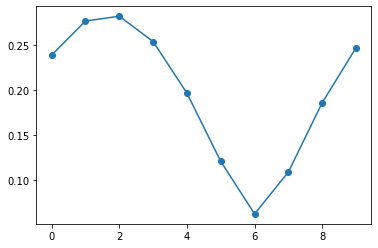

In [14]:
noisy_grover(5, 10)

In [15]:
hoge = state.copy()
U_w = make_U_w(nqubits)
U_w.update_quantum_state(hoge)
print(hoge.get_vector())

[ 2.38635627e-01-0.11781477j  2.21890121e-02-0.02945232j
  2.33053261e-01-0.04318162j  2.49767756e-04-0.06623244j
  2.06607027e-01-0.07610556j  1.68063663e-01-0.08145519j
  1.70534285e-01-0.06092576j  1.17035106e-01-0.08831842j
  5.36208872e-02+0.11479729j  2.73780150e-01-0.00924046j
  7.17505714e-03-0.00120383j  2.55220906e-01-0.18075761j
  2.86524343e-01+0.1309983j  -8.42331002e-03-0.16134976j
  8.20801887e-02+0.07808225j  9.23782113e-02+0.05250698j
  1.57421037e-01+0.05053471j  2.07189657e-01-0.08986533j
  1.65877220e-01+0.12910731j  1.84382244e-01-0.01387919j
  1.60547668e-01-0.06736635j  1.03467488e-01-0.00851625j
  1.10353512e-01-0.05955014j  1.58317246e-01+0.17327528j
  2.22980982e-02+0.03130105j -3.45712287e-03+0.11942518j
  3.27727637e-02-0.06553498j  1.74587663e-01-0.02603027j
  4.00462686e-02+0.02484313j  3.05057533e-02-0.05129741j
  1.39318123e-01+0.12721786j -2.19849231e-03+0.00369812j]


### シード値の変更
シード値が0〜10まででどうのような動きをするのか調べる

state: *** Quantum State ***
 * Qubit Count : 5
 * Dimension   : 32
 * State vector : 
    (0.120211,0.0366954)
   (-0.135465,0.0354719)
    (-0.143244,0.108053)
    (-0.184659,0.223588)
 (-0.0794907,-0.0761948)
  (0.00897271,-0.208204)
    (0.0415434,0.157029)
    (0.141498,0.0564049)
     (0.139704,0.152616)
    (-0.0356173,0.06018)
   (0.226897,-0.0297891)
  (0.0902091,-0.0345903)
     (0.159463,0.158476)
   (-0.0132584,0.103227)
    (-0.198321,0.115103)
   (-0.186658,0.0112958)
    (0.0906737,-0.10334)
  (0.000823056,0.157494)
      (0.18253,0.137886)
  (-0.0863334,0.0864738)
    (0.0419162,0.148939)
(-0.0290724,-0.00990831)
      (0.111413,0.14577)
    (-0.0629959,0.37559)
  (0.0740853,-0.0271972)
  (-0.0984743,0.0505111)
   (0.0747125,-0.130518)
     (0.0526343,0.06109)
  (-0.0979382,0.0519362)
   (-0.109681,0.0580736)
    (-0.138128,-0.02717)
    (-0.187495,0.200085)

noisy_groverのノルム:0.9999999999999989
maximal probability 1.719592e-01 is obtained at k = 2
state: *** Quantum Sta

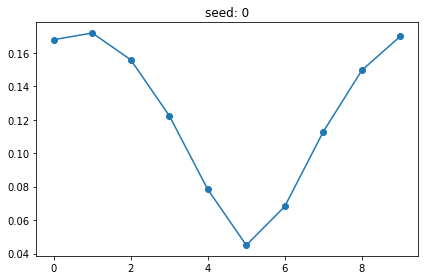

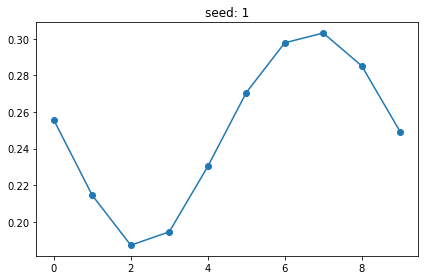

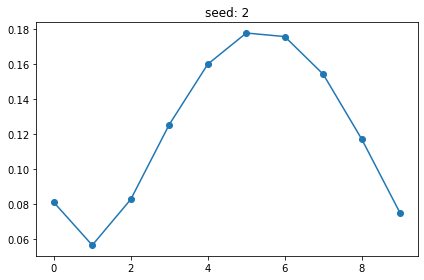

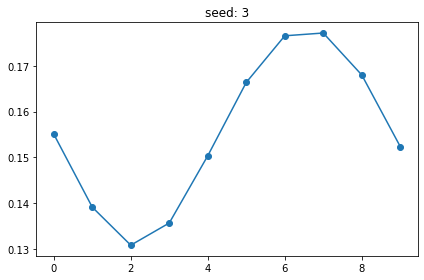

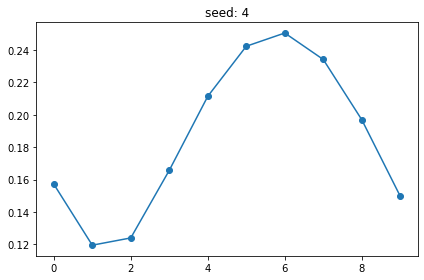

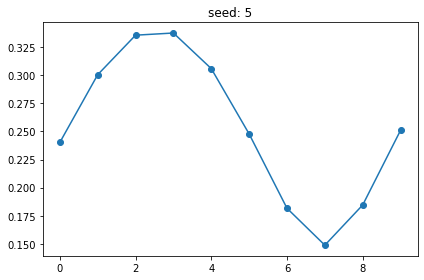

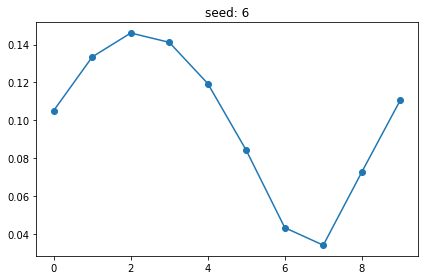

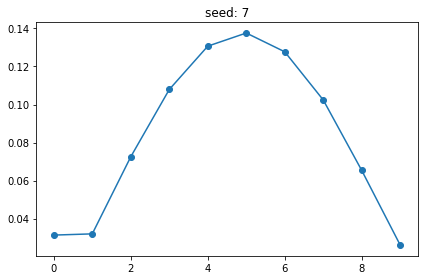

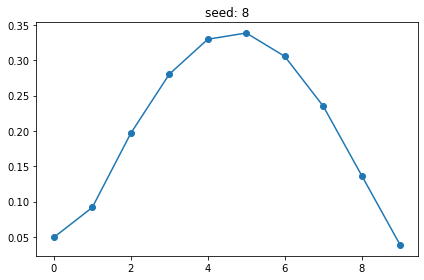

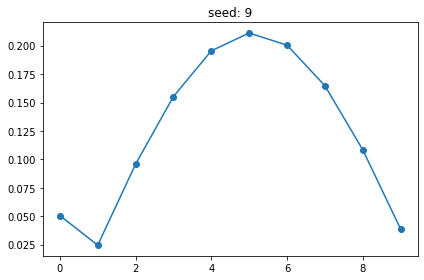

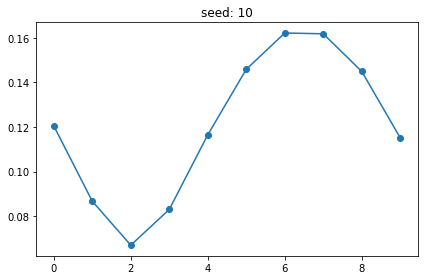

In [16]:
seed = 10
for i in range(seed + 1):
    plt.subplots(1, 1, tight_layout = True)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.title(f'seed: {i}')

    # noisy_grover(5, 10, i)
    noisy_grover(5, 10)

[0.2824917786820264, 0.17195915140237972, 0.3031051028734918, 0.1775904331837779, 0.17716970262927112, 0.25055200549586404, 0.3373000370413626, 0.14607905711056093, 0.1376043371350083, 0.3384904179728737, 0.21114069819081363, 0.16217526781116617]


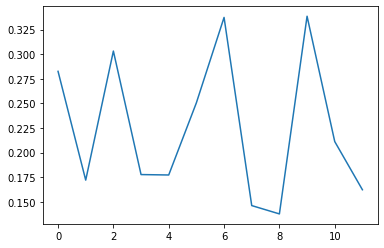

In [17]:
# max_resultのグラフを出力する
print(max_result)
plt.plot(max_result)